# Homework 8:  Resampling methods

This homework assignment is designed to give you practice with bootstrapping and permutation tests.

You will need to download the **unrestricted_trimmed_1_7_2020_10_50_44.csv** file from the *Homework/hcp_data* folder in the class GitHub repository. 

This data is a portion of the [Human Connectome Project database](http://www.humanconnectomeproject.org/). It provides measures of cognitive tasks and brain morphology measuresments from 1206 participants. The full description of each variable is provided in the **HCP_S1200_DataDictionary_April_20_2018.csv** file in the *Homework/hcp_data* folder in the class GitHub repository.

---
## 1. Loading & Visualizing the Data (1 point)

Use the `setwd` and `read.csv` functions to load data from the **unrestricted_trimmed_1_7_2020_10_50_44.csv** file. 

(a) Using the tidyverse tools, make a new dataframe `d1` that only inclues the subject ID (`Subject`), gender (`Gender`, self reported at time of data collection), Flanker Task performance (`Flanker_Unadj`), total intracranial volume (`FS_IntraCranial_Vol`), total white matter volume (`FS_Tot_WM_Vol`), and total grey matter volume (`FS_Total_GM_Vol`) variables and remove all _na_ values.

Use the `head` function to look at the first few rows of each data frame. 

In [54]:
library(tidyverse)


un <- read.csv("~/Desktop/DataSciencePsychNeuro/Homeworks/hcp_data/unrestricted_trimmed_1_7_2020_10_50_44.csv")

df <-select(un, Subject, Gender, Flanker_Unadj, FS_IntraCranial_Vol, FS_Tot_WM_Vol, FS_Total_GM_Vol)  
library(stats)
df <- na.omit(df)

head(df)

,Subject,Gender,Flanker_Unadj,FS_IntraCranial_Vol,FS_Tot_WM_Vol,FS_Total_GM_Vol
,<int>,<chr>,<dbl>,<dbl>,<int>,<int>
2,100206,M,130.42,1864518,543134,807245
3,100307,F,112.56,1512540,407292,664124
4,100408,M,121.18,1684117,500417,726206
5,100610,M,126.53,1816044,512946,762308
6,101006,F,101.85,1437868,429449,579632
7,101107,M,107.04,1512727,416995,665024


(b) Plot grey matter volume (x axis) against intracranial volume (y axis) and Gender (point color). 

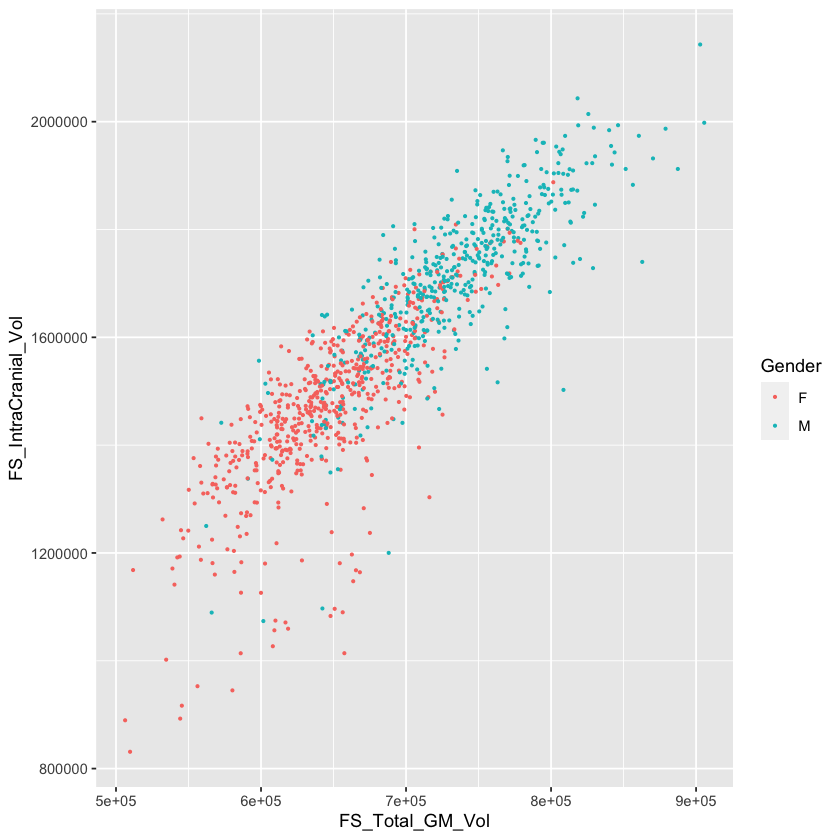

In [52]:
library(ggplot2)

options(repr.plot.width=7, repr.plot.height=7) 

ggplot(df, aes(x=FS_Total_GM_Vol, y=FS_IntraCranial_Vol, color=Gender)) +
  geom_point(size=0.5)  


What patterns do you observe in the scatter plot?

Female participants overall have less intracranial volume and less total grey matter volume than males. As intracranial volume increases so does grey matter volume.

---
## 2. Logistic classifier (2 points)

We want to try predicting gender using the neural data you have loaded.

(a) Run a logisic regression model to predict gender from total white matter volume, total grey matter volume, and intracranial volume. 

In [56]:
df$Gender <- as.factor(df$Gender)
glm <- glm(Gender ~ FS_Tot_WM_Vol + FS_Total_GM_Vol + FS_IntraCranial_Vol, data=df, family=binomial)
summary(glm)



Call:
glm(formula = Gender ~ FS_Tot_WM_Vol + FS_Total_GM_Vol + FS_IntraCranial_Vol, 
    family = binomial, data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.7695  -0.6173  -0.1863   0.5997   3.2309  

Coefficients:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)         -2.262e+01  1.347e+00 -16.787  < 2e-16 ***
FS_Tot_WM_Vol        2.140e-06  3.059e-06   0.699    0.484    
FS_Total_GM_Vol      1.959e-05  3.145e-06   6.229 4.70e-10 ***
FS_IntraCranial_Vol  5.020e-06  1.177e-06   4.263 2.01e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1534.13  on 1112  degrees of freedom
Residual deviance:  919.85  on 1109  degrees of freedom
AIC: 927.85

Number of Fisher Scoring iterations: 5


In [57]:

#Call:
#glm(formula = Gender ~ FS_Tot_WM_Vol + FS_Total_GM_Vol + FS_IntraCranial_Vol, 
    #family = binomial, data = df)

#Deviance Residuals: 
   # Min       1Q   Median       3Q      Max  
#-2.7695  -0.6173  -0.1863   0.5997   3.2309  

#Coefficients:
 #                     Estimate Std. Error z value Pr(>|z|)    
#(Intercept)         -2.262e+01  1.347e+00 -16.787  < 2e-16 ***
#FS_Tot_WM_Vol        2.140e-06  3.059e-06   0.699    0.484    
#FS_Total_GM_Vol      1.959e-05  3.145e-06   6.229 4.70e-10 ***
#FS_IntraCranial_Vol  5.020e-06  1.177e-06   4.263 2.01e-05 ***
---
#Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

#(Dispersion parameter for binomial family taken to be 1)

 #   Null deviance: 1534.13  on 1112  degrees of freedom
#Residual deviance:  919.85  on 1109  degrees of freedom
#AIC: 927.85

#Number of Fisher Scoring iterations: 5


ERROR: Error in parse(text = x, srcfile = src): <text>:6:10: unexpected symbol
5: 
6: Deviance Residuals
            ^


Which factors are signficantly associated with gender?

The factors significantly associated with gender are grey matter volume and intracranial volume.

(b) Estimate the prediction accuracy of your model (Note: this is the training set accuracy). Set your prediction threshold to 0.5.

In [33]:
glm_df = data.frame(predict(glm, type = "response"))
colnames(glm_df) = c('predicted_correct')

num_obs = nrow(glm_df)
glm_df$index = seq(1, num_obs)

threshold = 0.5

glm_df$predicted_binary=rep("F",num_obs)  
glm_df$predicted_binary[glm_df$predicted_correct>threshold]="M" 

confusion_df = data.frame(glm_df$predicted_binary, df$Gender)
colnames(confusion_df) = c('predicted', 'actual')

table(confusion_df)

print(paste("Accuracy:",mean(confusion_df$predicted == confusion_df$actual)))


         actual
predicted   F   M
        F 516 110
        M  90 397

[1] "Accuracy: 0.820305480682839"


What is the prediction accuracy for gender from the full model?

The prediction accuracy for gender from the full model was 82%.


---
## 3. Bootstrapped accuracy (3 points)

Use bootstrapping to estimate the confidence intervals of the _prediction accuracy_ of your model. Plot the histogram of the bootstrapped prediction accuracies and estimate the confidence intervals off of the standard deviation from the bootstrap.


[1] 0.8203055

ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = df, statistic = boot.fn, R = 1000)


Bootstrap Statistics :
     original     bias    std. error
t1* 0.8203055 -0.3142327  0.01511938


[1] 0.5051845

[1] 0.506961

[1] 0.5060728

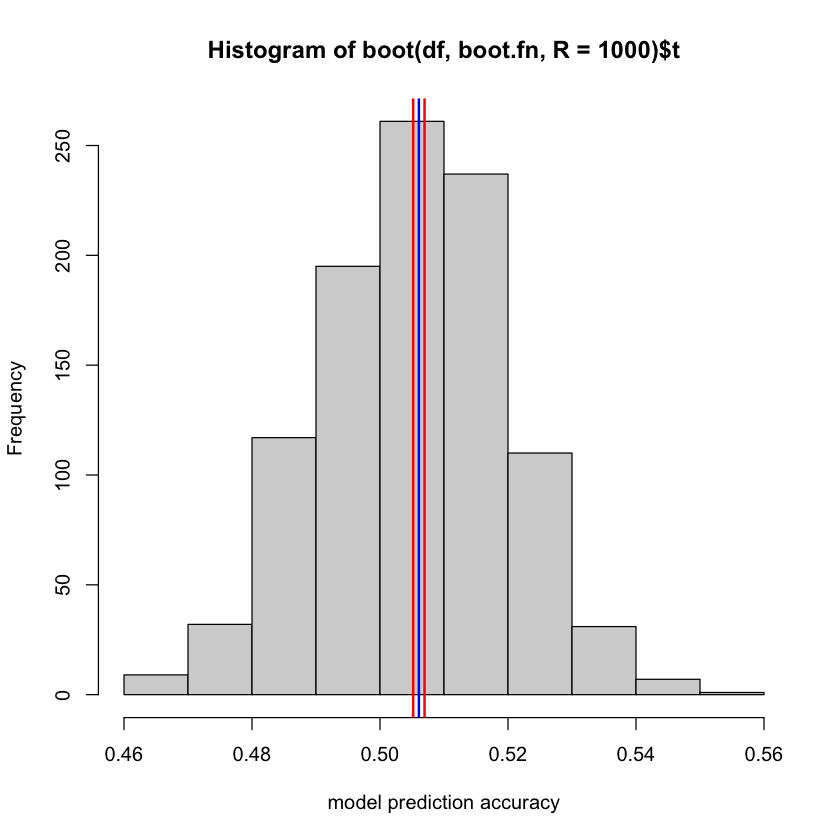

In [64]:
library(boot)

boot.fn <-function (data, index){
    glm<- glm(Gender ~ FS_Tot_WM_Vol + FS_Total_GM_Vol + FS_IntraCranial_Vol, data=data, subset=index, family=binomial)
    glm_df = data.frame(predict(glm, type = "response"))
colnames(glm_df) = c('predicted_correct')

num_obs = nrow(glm_df)
glm_df$index = seq(1, num_obs)

threshold = 0.5

glm_df$predicted_binary=rep("F",num_obs)  
glm_df$predicted_binary[glm_df$predicted_correct>threshold]="M" 

confusion_df = data.frame(glm_df$predicted_binary, df$Gender)
colnames(confusion_df) = c('predicted', 'actual')

table(confusion_df)

    
    return(mean(confusion_df$predicted==confusion_df$actual))
    }

print(boot.fn(df, 1:1113))
boot_obj=boot(df, boot.fn, R=1000)
print(boot_obj)

## CI Calculation:
boot_mean <- mean(boot_obj$t)
boot_stdev <- sd(boot_obj$t)
n <- nrow(df)
error <- qnorm(0.975)*boot_stdev/sqrt(n)
left <- boot_mean-error
right <- boot_mean+error
left
right
## CI: 0.81775 to 0.81829

boot_mean

hist(boot(df, boot.fn, R=1000)$t, xlab="model prediction accuracy")
abline(v=c(left, right),col="red",lwd=2)
abline(v=boot_mean,col="blue",lwd=2)
      








How robust is the prediction accuracy of the full model?

The prediction accuracy of the full model is not robust - the original accuracy (82%) and the bagged accuracy (50%) are not the same . The confidence interval does not include zero so we can reject the null hypothesis. 

---
## 4. Permutation test for grey matter effects (3 points)

Now run a permutation test, with 1000 iterations, to evaluate how much grey matter volume contributes to the prediction accuracy. Compare the prediction accuracy of the full (unpermuted model) with the distribution of accuracies you get with a randomized grey matter volume term using a histogram (Hint: use the `abline` function to show the original accuracy on the histogram).

[1] 0

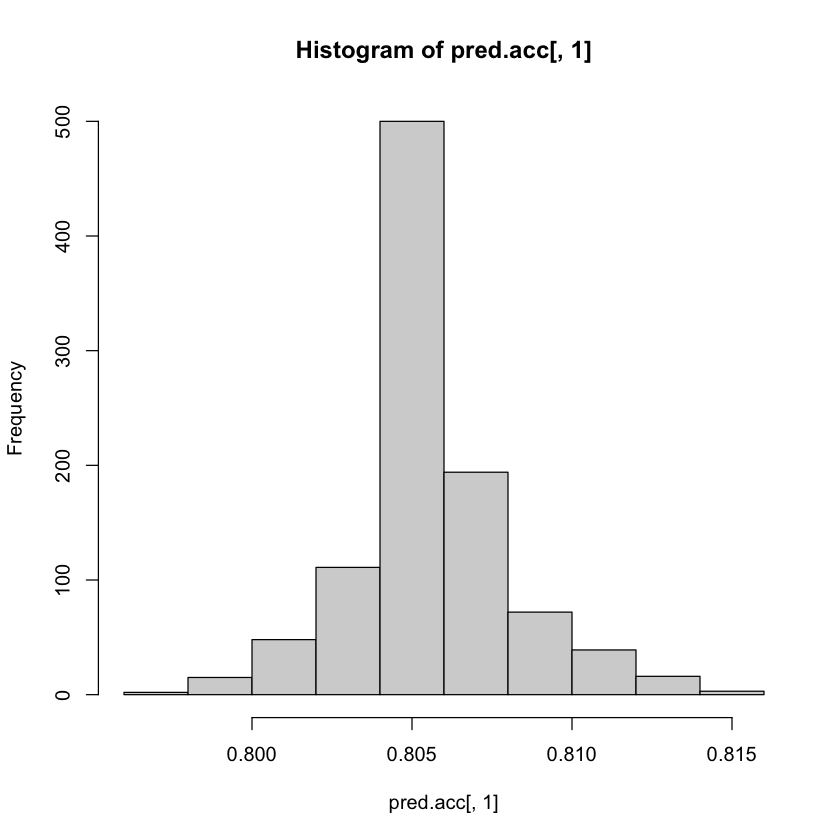

In [82]:
acc.fn <-function (data,model){
glm_df = data.frame(predict(glm, type = "response"))
colnames(glm_df) = c('predicted_correct')

num_obs = nrow(glm_df)
glm_df$index = seq(1, num_obs)

threshold = 0.5

glm_df$predicted_binary=rep("F",num_obs)  
glm_df$predicted_binary[glm_df$predicted_correct>threshold]="M" 

confusion_df = data.frame(glm_df$predicted_binary, df$Gender)
colnames(confusion_df) = c('predicted', 'actual')

table(confusion_df)
    
return(mean(confusion_df$predicted==confusion_df$actual))
    }

perm_df = df

R = 1000
## Make output object to store results
perm.coefs=matrix(NA,nrow=R, ncol=4)
pred.acc=matrix(NA, nrow=R, ncol=1)
predacc.real=matrix(0.8203055, nrow=R, ncol=1)


for (i in 1:R){
  perm_df$FS_Total_GM_Vol=df$FS_Total_GM_Vol[sample(1113)]
  perm.coefs[i,]=coef(glm(Gender ~ FS_Tot_WM_Vol + FS_Total_GM_Vol + FS_IntraCranial_Vol, data = perm_df, family = "binomial"))
   glm=glm(Gender ~ FS_Tot_WM_Vol + FS_Total_GM_Vol + FS_IntraCranial_Vol, data = perm_df, family = "binomial")
   pred.acc[i,]=acc.fn(perm_df, glm)
}
 
hist(pred.acc[,1])
abline(v=0.820)

perm.p = sum(perm.coefs[,2]<perm.real[2])/R 
perm.p


How much does the grey matter volume influence the prediction accuracy of the model?

Grey matter volume is very influencial in prediction accuracy of the model. True prediction accuracy comes from a distribution other than the null distribution.We can reject the null hypothesis that grey matter volume does not influence the prediction accuracy of the model given this plot.

---
## 5. Reflection (1 point)

Differentiate the bootstrap from a permutation test. Describe each and when is it appropriate to each.

Permutation scrambles the x and y randomly breaking the link across observations. With bootstrapping the goal is estimating the confidence in your observed effects by creating a new simulated dataframe with replacement and the x and y values are not scrambled. Permutations are best for inferencing and testing hypothesis/finding the true null. Bootstrapping is best for prediction. 

**DUE:** 5pm EST, April 1, 2022

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here. 
Avital, Emily & Ketura